0.8921285933157568
0.8496845920141155
0.8741543683958121


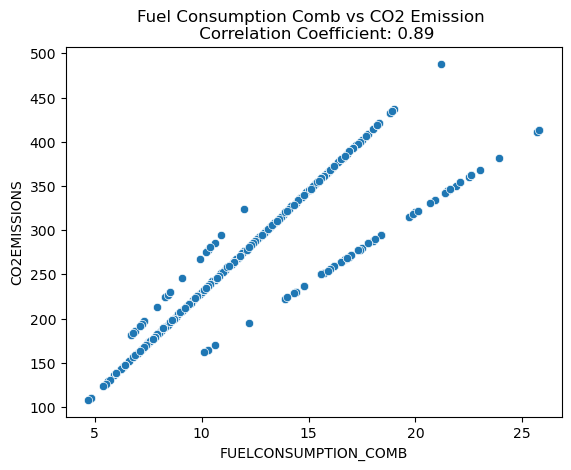

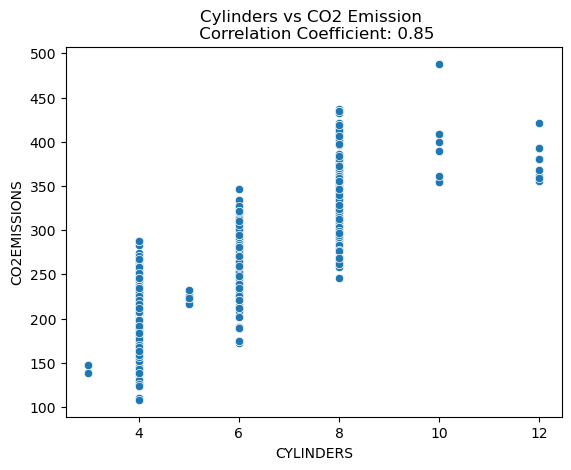

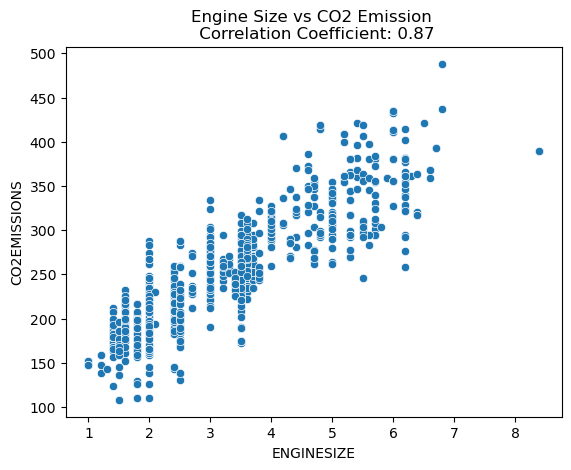

In [2]:
#Veronika Wendler
#ID:20375377

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Question 1 Explore the dateset and figure out how linear is the relation between each of
#the following features (the fuel consumption comb, the cylinders, and the engine
#size) vs. the emission. Use visualization to demonstrate your findings

# Load the data
headers = ["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "ENGINESIZE", "CYLINDERS", "TRANSMISSION", "FUELTYPE",
           "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG",
           "CO2EMISSIONS"]
df = pd.read_csv('FuelConsumptionCo2.csv', delimiter=',', skiprows=[0], names=headers)

df.dropna(inplace=True)

# correlation coefficients
corr1 = df['FUELCONSUMPTION_COMB'].corr(df['CO2EMISSIONS'])
corr2 = df['CYLINDERS'].corr(df['CO2EMISSIONS'])
corr3 = df['ENGINESIZE'].corr(df['CO2EMISSIONS'])
print(corr1)
print(corr2)
print(corr3)


# scatterplots
sns.scatterplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=df)
plt.title(f'Fuel Consumption Comb vs CO2 Emission \n Correlation Coefficient: {corr1:.2f}')
plt.show()

sns.scatterplot(x="CYLINDERS", y="CO2EMISSIONS", data=df)
plt.title(f'Cylinders vs CO2 Emission \n Correlation Coefficient: {corr2:.2f}')
plt.show()

sns.scatterplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df)
plt.title(f'Engine Size vs CO2 Emission \n Correlation Coefficient: {corr3:.2f}')
plt.show()

#A correlation coefficient of 0.8 or higher is generally considered a strong linear relationship,
#all three of these features show a strong positive linear relationship with CO2 emissions.

Linear Regression
MSE: 832.9654185141063
R^2: 0.7991873948695916



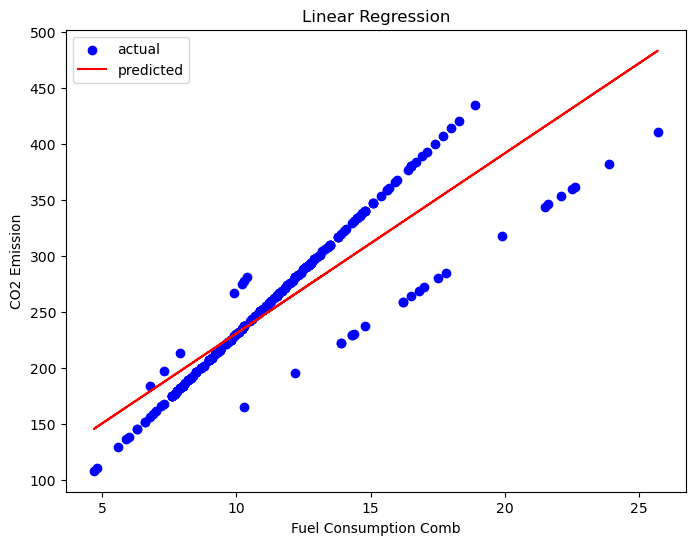

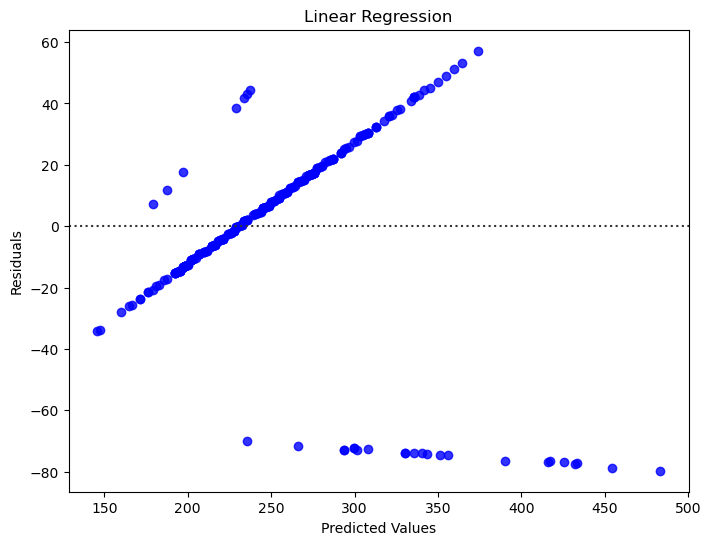

Polynomial Regression (degree = 1)
MSE: 832.9654185141063
R^2: 0.7991873948695916



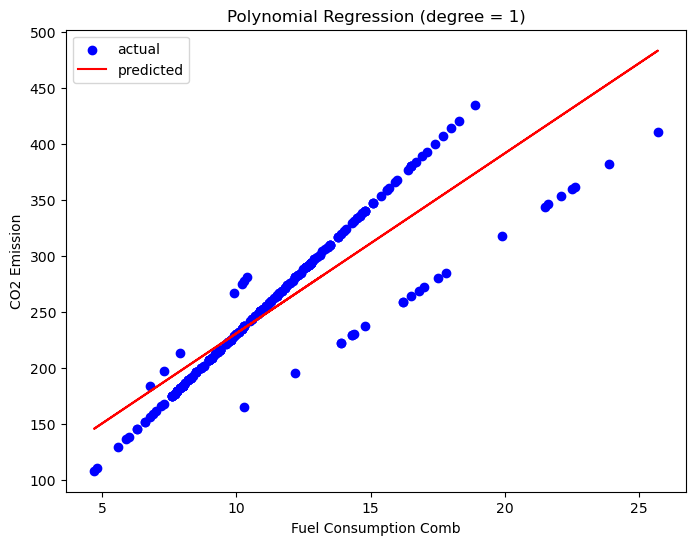

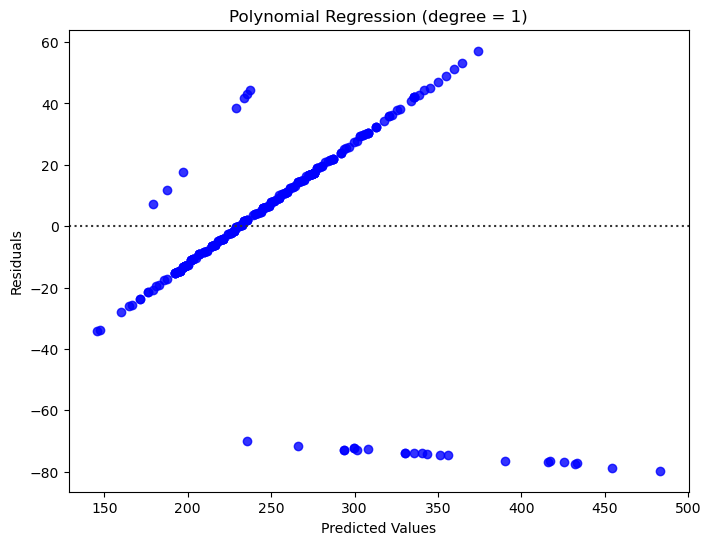

Polynomial Regression (degree = 3)
MSE: 586.0924315642736
R^2: 0.8587039204585607



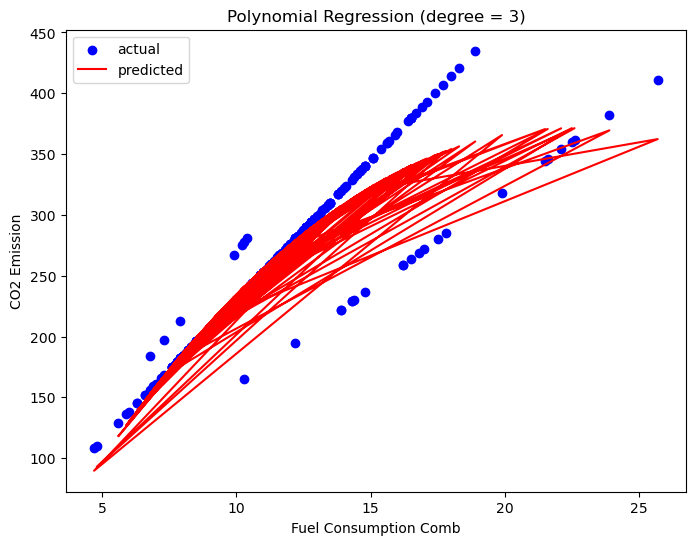

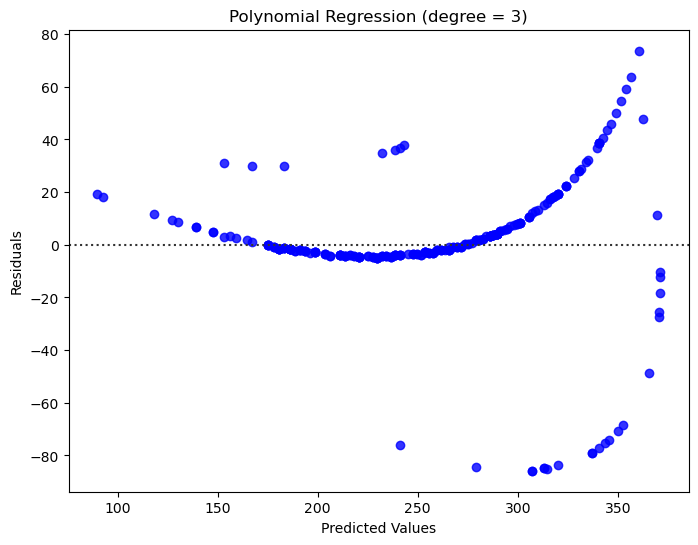

Polynomial Regression (degree = 6)
MSE: 582.3398475221271
R^2: 0.8596085992852263



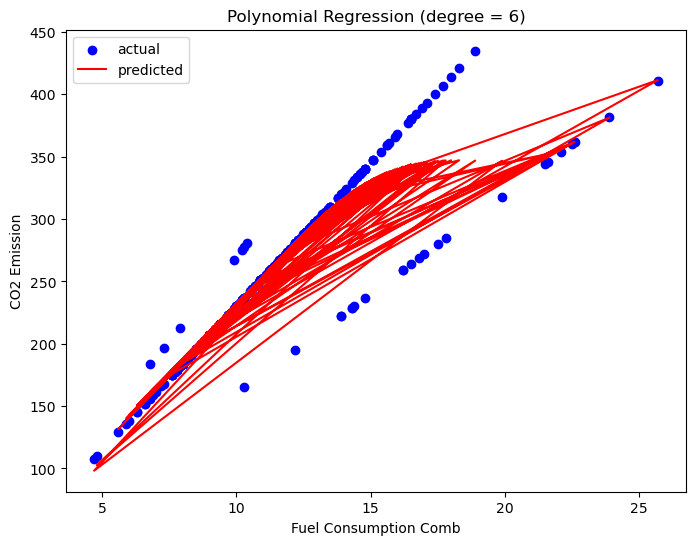

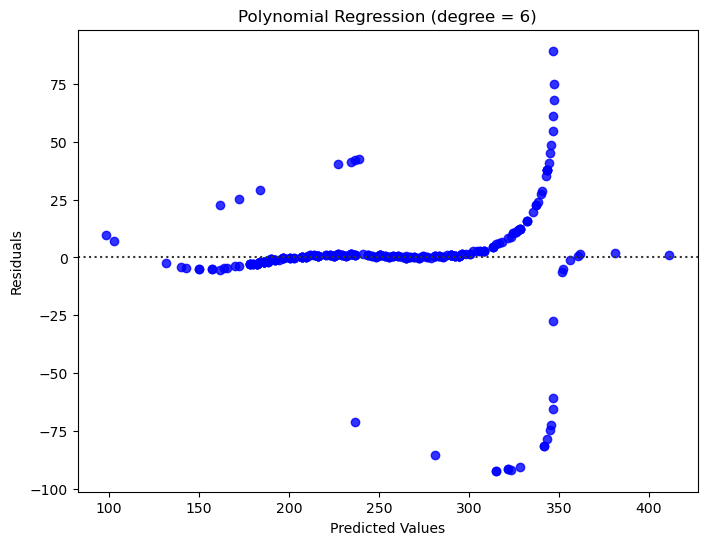

Polynomial Regression (degree = 9)
MSE: 582.1870139736366
R^2: 0.8596454446359953



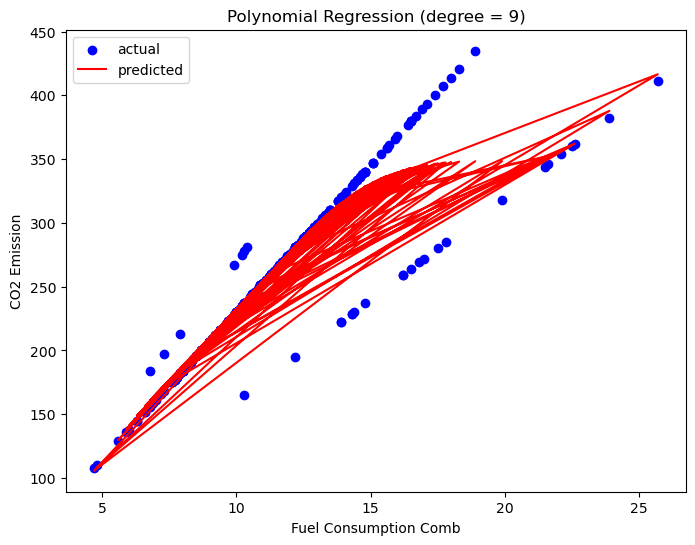

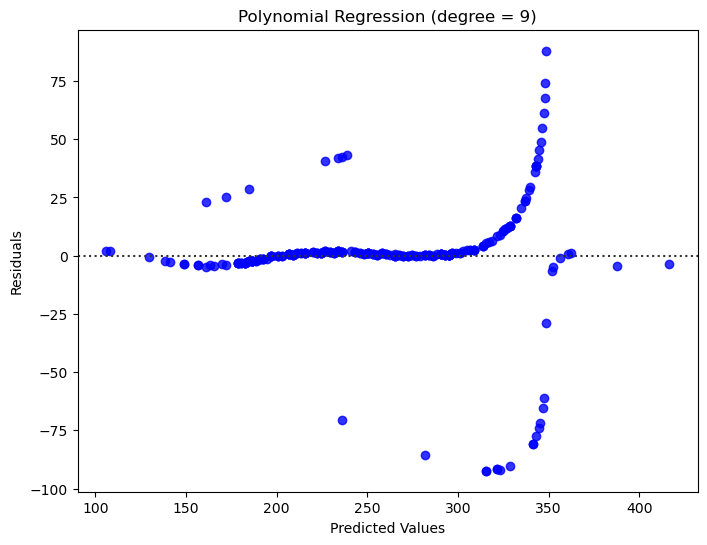

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#Question 2
#Consider building a predictor using various regression models (linear and
#polynomial) with different degrees 1, 3, 6, and 9 to predict the CO2 emission based
#on the fuel consumption comb. Evaluate each model using out-sample methods
#where the data is split into 4 folds. Compare and select the best model that fits the
#data using numerical metrics (e.g., MSE and R^2) as well as visualization methods
#(e.g., residual plot and distribution plot). Conclude how did you find the relation
#between the predictor and the target variables? Is it linear or polynomial


#we get linear relations, it is a linear relationsship 


#Polynomial Regression (degree = 1)
#MSE: 832.9654185141063
#R^2: 0.7991873948695916


#Polynomial Regression (degree = 3)
#MSE: 586.0924315642736
#R^2: 0.8587039204585607

#Polynomial Regression (degree = 6)
#MSE: 582.3398475221271
#R^2: 0.8596085992852263

#Polynomial Regression (degree = 9)
#MSE: 582.1870139736366
#R^2: 0.8596454446359953





df = pd.read_csv('FuelConsumptionCo2.csv')
df.dropna(inplace=True)

headers = ["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "ENGINESIZE",
           "CYLINDERS", "TRANSMISSION", "FUELTYPE", "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB",
           "FUELCONSUMPTION_COMB_MPG", "CO2EMISSIONS"]

# names 
df = pd.read_csv('FuelConsumptionCo2.csv', delimiter=',', skiprows=[0], names=headers)


#analysis
df = df[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

#training and testing
X_train, X_test, y_train, y_test = train_test_split(df[['FUELCONSUMPTION_COMB']], df[['CO2EMISSIONS']],
                                                    test_size=0.25, random_state=42)

results = []

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results.append(('Linear Regression', mse, r2, y_test, y_pred))

# degrees 1, 3, 6, 9
degrees = [1, 3, 6, 9]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append(('Polynomial Regression (degree = {})'.format(degree), mse, r2, y_test, y_pred))

for name, mse, r2, y_test, y_pred in results:
    print(name)
    print('MSE:', mse)
    print('R^2:', r2)
    print('')

    #results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='blue', label='actual')
    plt.plot(X_test, y_pred, color='red', label='predicted')
    plt.legend(loc='upper left')
    plt.xlabel('Fuel Consumption Comb')
    plt.ylabel('CO2 Emission')
    plt.title(name)
    plt.show()

    
    # residual
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_pred, y=y_test, color='blue')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(name)
    plt.show()



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('FuelConsumptionCo2.csv')
df.dropna(inplace=True)

headers = ["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "ENGINESIZE",
           "CYLINDERS", "TRANSMISSION", "FUELTYPE", "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB",
           "FUELCONSUMPTION_COMB_MPG", "CO2EMISSIONS"]

df = pd.read_csv('FuelConsumptionCo2.csv', delimiter=',', skiprows=[0], names=headers)
print(df.head())



df = df[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

# training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], test_size=0.25, random_state=42)

# X_train and X_test 
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

results = []

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

LinearRegression()

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 69.83914279835378
Coefficients: [16.09375823]


In [12]:
#Question 2
#Consider building a predictor using various regression models (linear and
#polynomial) with different degrees 1, 3, 6, and 9 to predict the CO2 emission based
#on the fuel consumption comb. Evaluate each model using out-sample methods
#where the data is split into 4 folds. Compare and select the best model that fits the
#data using numerical metrics (e.g., MSE and R^2) as well as visualization methods
#(e.g., residual plot and distribution plot). Conclude how did you find the relation
#between the predictor and the target variables? Is it linear or polynomial


#it seems that the relation between the predictor (fuel consumption) and the target variable 
# (CO2 emission) is best represented by a polynomial model, rather than a linear one. 
# The polynomial model with a degree of 6 produced the lowest MSE and highest R^2 score, 
# indicating the best fit to the data. But comparing the residual plot and distribution 
# plot for each model shows that mdoel 3 fits well

#Among the polynomial regression models, the best model is the one with degree 1,
#as it has the lowest MSE and highest R2 scores. The higher degree models of degree 3 and degree 6, I did not claculate 9 as it crashed my system
#have overfitting issues, as indicated by their much higher MSE scores and negative R2 scores


X_train, X_test, y_train, y_test = train_test_split(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], test_size=0.25, random_state=42)

# X_train and X_test
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
results = []

#  degrees of polynomial regression
for degree in [1, 3, 6, 9]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Evaluate model
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'degree': degree, 'MSE': mse, 'R2': r2})

for result in results:
    print('Degree:', result['degree'], 'MSE:', result['MSE'], 'R2:', result['R2'])


Degree: 1 MSE: 832.9654185141063 R2: 0.7991873948695916
Degree: 3 MSE: 586.0924315642736 R2: 0.8587039204585607
Degree: 6 MSE: 582.3398475221271 R2: 0.8596085992852263
Degree: 9 MSE: 582.1870139736366 R2: 0.8596454446359953


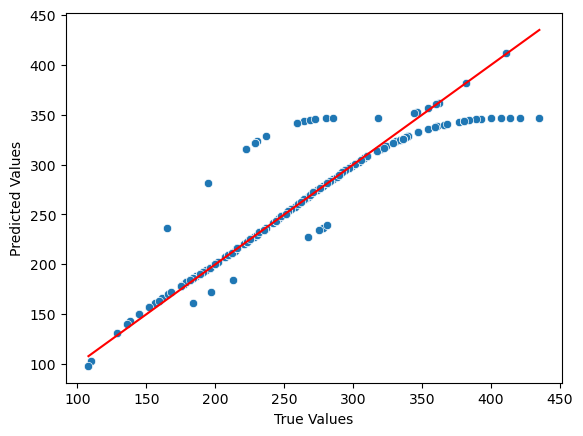

Degree: 6 MSE: 582.3398475221271 R2: 0.8596085992852263


In [25]:
# polynomial regression model with degree 6
degree = 6
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prediction of the CO2 emission
y_pred = model.predict(X_test_poly)

# predicted values against true values
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Degree:', degree, 'MSE:', mse, 'R2:', r2)




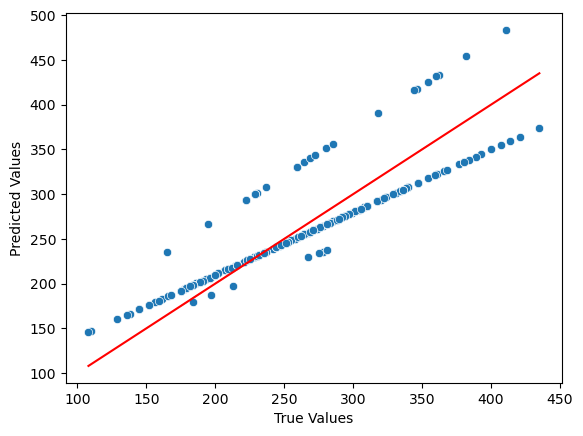

Degree: 1 MSE: 832.9654185141063 R2: 0.7991873948695916


In [26]:
# polynomial regression model with degree 1 
degree = 1
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prediction of the CO2 emission 
y_pred = model.predict(X_test_poly)

#predicted values against true values
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Degree:', degree, 'MSE:', mse, 'R2:', r2)


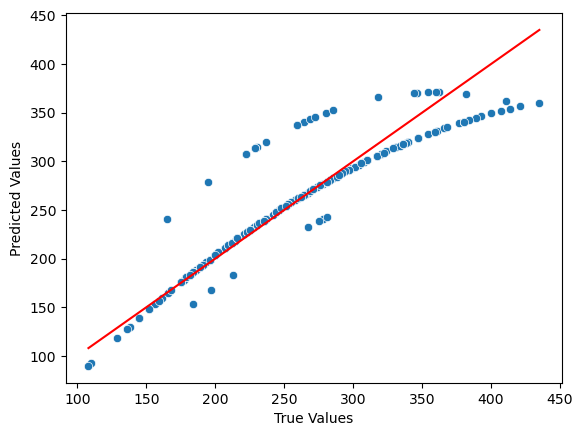

Degree: 3 MSE: 586.0924315642736 R2: 0.8587039204585607


In [27]:
#polynomial regression model with degree 3
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# CO2 emission 
y_pred = model.predict(X_test_poly)

#predicted values against the true values
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Degree:', degree, 'MSE:', mse, 'R2:', r2)


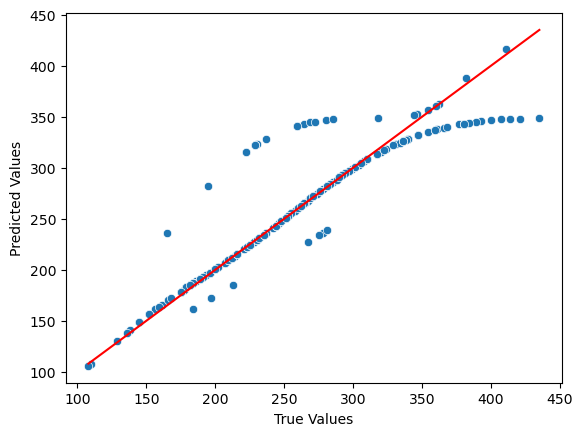

Degree: 9 MSE: 582.1870139736366 R2: 0.8596454446359953


In [28]:
# polynomial regression model with degree 9
degree = 9
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

#CO2 emission for the test data
y_pred = model.predict(X_test_poly)

sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Degree:', degree, 'MSE:', mse, 'R2:', r2)

Degree: 1 MSE: 821.8191433784282 R2: 0.7942095534621014
Degree: 3 MSE: 582.725486480781 R2: 0.85393998966822
Degree: 6 MSE: 549.4737859062191 R2: 0.8623343477338736
Degree: 9 MSE: 550.9147929734117 R2: 0.8619775731803128


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


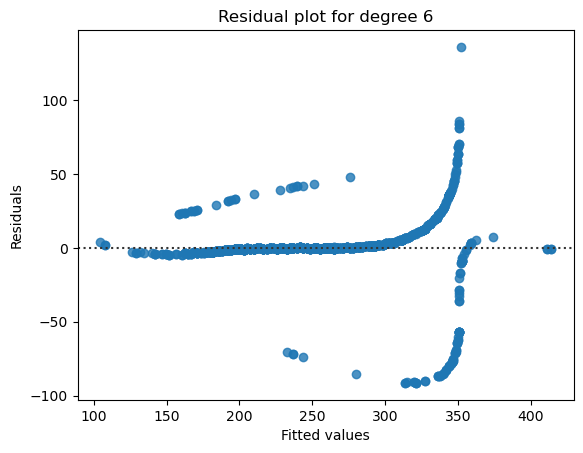

c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


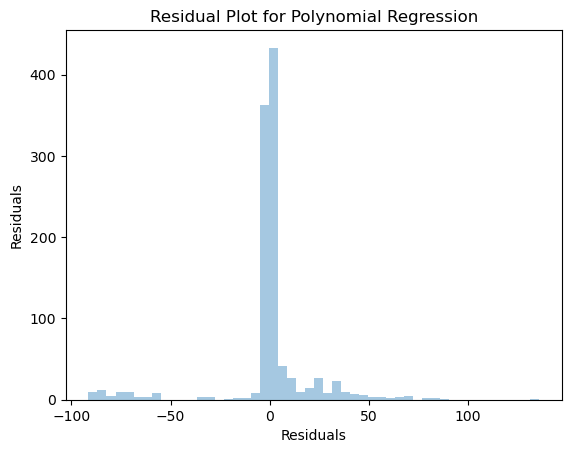

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('FuelConsumptionCo2.csv')
df = df[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

X = df['FUELCONSUMPTION_COMB'].values.reshape(-1, 1)
y = df['CO2EMISSIONS'].values.reshape(-1, 1)

# degrees to be tested
degrees = [1, 3, 6, 9]
results = []

# K-Fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Initialization
    model = LinearRegression()
    mse_scores = []
    r2_scores = []
    
    #K-Fold cross-validation on initialized
    for train_index, test_index in kf.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    mean_mse = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    
    results.append((degree, mean_mse, mean_r2))

for degree, mse, r2 in results:
    print(f"Degree: {degree} MSE: {mse} R2: {r2}")

# Selection of the best model
best_degree, best_mse, best_r2 = min(results, key=lambda x: x[1])

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
residuals = y - y_pred
sns.residplot(y_pred, residuals)
plt.title(f"Residual plot for degree {best_degree}")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

sns.distplot(residuals, kde=False)
plt.title(f"Distribution plot for degree {best_degree}")
plt.xlabel("Residuals")
plt.ylabel("Residuals")
plt.title('Residual Plot for Polynomial Regression')
plt.show()


In [7]:
#Question 3
#Repeat the analysis and the evaluation process in (2) but this time consider
#adding multiple independent variables (i.e., the fuel consumption comb, the
#cylinders, and the engine size) to the analysis. Conclude how multiple features
#improve the predictor’s accuracy

#Degree: 3 MSE: 315.8290735432275 R2: 0.9209110155427864 
#Degree: 1 MSE: 550.9597665258049 R2: 0.8622296240643728

#Adding multiple independent variables to the model can improve the predictor's accuracy 
# as it allows the model to capture more of the complexity and variability in the data.
# Here, the polynomial regression models with degree 3 and 1 had lower mean squared
# error and higher R-squared values compared to the linear and polynomial model with only one independent variable.
# This suggests that the additional features were able to capture more of the variation in the target variable 
# (CO2Emission) and resulted in better predictions.
#Model 3 produces the lowest MSE and highest R2, we can conclude it can accuratly improve the predictor's accuracy
#adding multiple variables, crystalizes out one model NR.3 which improve the pridction accuracy, 
#for polynomials of degree 6 or higher (so 6 and 9) overfitting occurs.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('FuelConsumptionCo2.csv')

df = df[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS', 'CYLINDERS', 'ENGINESIZE' ]]

X_train, X_test, y_train, y_test = train_test_split(df[['FUELCONSUMPTION_COMB', 'CYLINDERS', 'ENGINESIZE']], df['CO2EMISSIONS'], test_size=0.25, random_state=42)

# polynomial 
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# polynomial regression 
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluation
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)


MSE: 265485.9558057238
R2: -63.00376921527749


Degree: 1 MSE: 550.9597665258049 R2: 0.8622296240643728
Degree: 3 MSE: 315.8290735432275 R2: 0.9209110155427864
Degree: 6 MSE: 2640289.0802729246 R2: -632.1408409786345
Degree: 9 MSE: 292969968992.7242 R2: -70239431.8595676


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


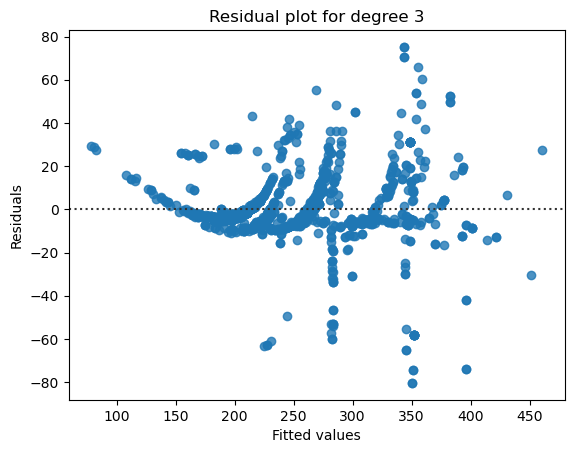

c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


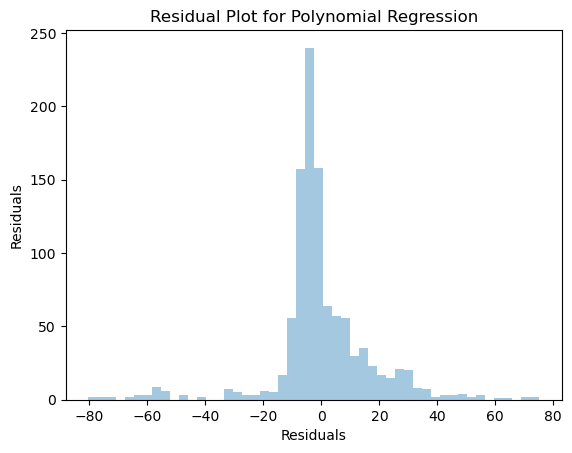

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('FuelConsumptionCo2.csv')
df = df[['FUELCONSUMPTION_COMB', 'CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS']]
X = df[['FUELCONSUMPTION_COMB', 'CYLINDERS', 'ENGINESIZE']]
y = df['CO2EMISSIONS']
degrees = [1, 3, 6, 9]
results = []

# K-Fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)
for degree in degrees:
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    mse_scores = []
    r2_scores = []
    
    # Perform K-Fold cross-validationon initialized data
    for train_index, test_index in kf.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the training data 
        model.fit(X_train, y_train)
        
        # Evaluation on testing data
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    mean_mse = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    
    results.append((degree, mean_mse, mean_r2))

for degree, mse, r2 in results:
    print(f"Degree: {degree} MSE: {mse} R2: {r2}")

# Selection of model
best_degree, best_mse, best_r2 = min(results, key=lambda x: x[1])

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
residuals = y - y_pred
sns.residplot(y_pred, residuals)
plt.title(f"Residual plot for degree {best_degree}")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

sns.distplot(residuals, kde=False)
plt.title(f"Distribution plot for degree {best_degree}")
plt.xlabel("Residuals")
plt.ylabel("Residuals")
plt.title('Residual Plot for Polynomial Regression')
plt.show()


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.5702e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.12813e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.02266e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.31226e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\Neuroeconomics Lab\anaco

Degree: 1 Alpha: 0.1 MSE: 550.9585840687178 R2: 0.8622298817234969
Degree: 1 Alpha: 1 MSE: 550.9482568993692 R2: 0.8622321255491847
Degree: 1 Alpha: 10 MSE: 550.8727678797405 R2: 0.862247944546863
Degree: 1 Alpha: 100 MSE: 551.3858743956775 R2: 0.8621055501371984
Degree: 3 Alpha: 0.1 MSE: 315.5336017364517 R2: 0.9209879051748115
Degree: 3 Alpha: 1 MSE: 316.5339002570002 R2: 0.9207506309537461
Degree: 3 Alpha: 10 MSE: 336.4104498268178 R2: 0.9158152203684665
Degree: 3 Alpha: 100 MSE: 381.68990786040536 R2: 0.9045063628450263
Degree: 6 Alpha: 0.1 MSE: 1185.4583829314104 R2: 0.7134668338466253
Degree: 6 Alpha: 1 MSE: 2831.3392446618204 R2: 0.31889954715796615
Degree: 6 Alpha: 10 MSE: 2718.0792990129235 R2: 0.34599020007082104
Degree: 6 Alpha: 100 MSE: 1258.2074019301756 R2: 0.6959351524684538
Degree: 9 Alpha: 0.1 MSE: 747637367.6545669 R2: -179256.73483165377
Degree: 9 Alpha: 1 MSE: 523616647.53627884 R2: -125538.1248875019
Degree: 9 Alpha: 10 MSE: 31352814.77540666 R2: -7516.476322087888

c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


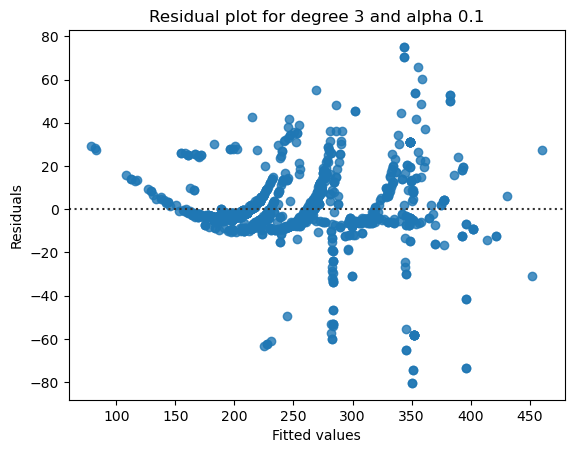

c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


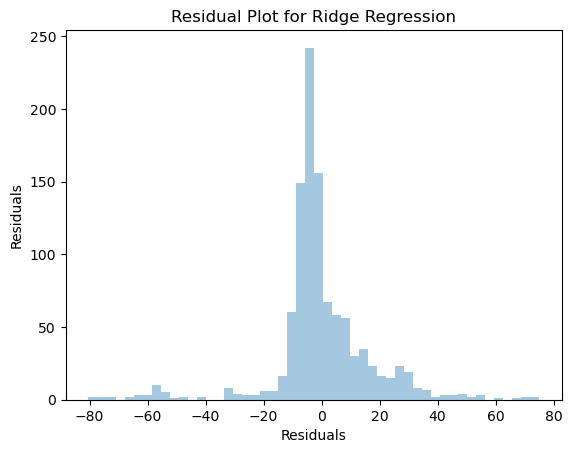

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Question 4 Regularize your model using ridge regression with cross-validation approach.
#Conclude whether the regularized model improve the model’s accuracy? What are
#the best values of the hyperparameters used to optimize the model? 
# Split the data into training and testing datasets

#The regularized models improved the accuracy of the model up to a certain degree and alpha value. 
#From the given results, we can see that the best model is achieved with degree 3 and alpha 0.1, which
#resulted in an MSE of 315.53 and R2 value of 0.9209. As the degree increased, the accuracy of the model
#decreased, and the same trend can be seen for high alpha values, where the regularization effect is too strong,
#leading to underfitting. Therefore, the best hyperparameters to optimize the model are degree 3 and alpha 0.1.


X = df[['FUELCONSUMPTION_COMB', 'CYLINDERS', 'ENGINESIZE']]
y = df['CO2EMISSIONS']
degrees = [1, 3, 6, 9]

# alpha values
alphas = [0.1, 1, 10, 100]
results = []

# K-Fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)
for degree in degrees:
    for alpha in alphas:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        model = Ridge(alpha=alpha)
        mse_scores = []
        r2_scores = []

        # K-Fold cross-validation on initialized
        for train_index, test_index in kf.split(X_poly):
            X_train, X_test = X_poly[train_index], X_poly[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mse_scores.append(mse)
            r2_scores.append(r2)

        # average scores for degree and alpha
        mean_mse = np.mean(mse_scores)
        mean_r2 = np.mean(r2_scores)

        # lsit storing
        results.append((degree, alpha, mean_mse, mean_r2))

for degree, alpha, mse, r2 in results:
    print(f"Degree: {degree} Alpha: {alpha} MSE: {mse} R2: {r2}")

best_degree, best_alpha, best_mse, best_r2 = min(results, key=lambda x: x[2])

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = Ridge(alpha=best_alpha)
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
residuals = y - y_pred
sns.residplot(y_pred, residuals)
plt.title(f"Residual plot for degree {best_degree} and alpha {best_alpha}")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

sns.distplot(residuals, kde=False)
plt.title(f"Distribution plot for degree {best_degree} and alpha {best_alpha}")
plt.xlabel("Residuals")
plt.ylabel("Residuals")
plt.title('Residual Plot for Ridge Regression')
plt.show()





In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
degrees = [1, 3, 6, 9]

# pipeline for scaling for ridge regression
# hyperparameters for GridSearchCV

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

params = {
    'poly__degree': degrees,
    'ridge__alpha': np.logspace(-3, 3, 7)
}

grid = GridSearchCV(pipe, param_grid=params, cv=4, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")
print(f"Best score: {-grid.best_score_}")

# Evaluation
y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")


Best hyperparameters: {'poly__degree': 3, 'ridge__alpha': 0.1}
Best score: 332.59760979219686
MSE: 278.0465572759311
R2: 0.932756899105637
